In [149]:
# !pip install mne

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne

from scipy.signal import spectrogram

import seaborn as sns

### Importar datos

In [151]:
#Obtener ruta de la adquisición

ruta = 'https://raw.githubusercontent.com/danielAcl9/adquisicionesPract/main/Adquisiciones/UNAB/B%26F_P%26S_Adquisici%C3%B3n-%5B2023.11.17-11.11.42%5D.csv?token=GHSAT0AAAAAACNGQNX3LHPTEILOSVOCSVLQZNPBLRA'
df = pd.read_csv(ruta)

In [152]:
#Renombrar columnas
df = df.drop(columns=['Event Id', 'Event Date', 'Event Duration'])
df.rename(columns= {'CZ':'C3', '14':'C1', '4':'Cz', '5':'C2', '6':'C4', '7':'CP3', '10':'CPz', '12':'CP4'}, inplace=True)

#### Resumen y descripción de los datos

In [153]:
df.describe()

,Time:250Hz,Epoch,C3,C1,Cz,C2,C4,CP3,CPz,CP4
count,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000
mean,220.926000,1725.500000,0.079308,-0.021357,-0.062787,0.008814,0.079304,0.069090,-0.065722,-0.078253
std,127.553417,996.511033,16.481907,15.161268,14.905301,44.092569,14.988896,15.536851,15.102283,14.200766
min,0.000000,0.000000,-95.061356,-82.913544,-77.286156,-198.751556,-94.547089,-85.121002,-75.235634,-75.573311
25%,110.463000,862.750000,-9.659525,-8.553441,-9.029609,-15.369023,-9.037896,-9.360713,-9.325111,-8.605836
50%,220.926000,1725.500000,-0.313042,-0.126917,-0.137256,-0.235942,0.031957,0.122853,-0.130196,-0.136546
75%,331.388999,2588.250000,9.249447,8.346955,8.682078,15.250536,8.972482,9.322290,8.981522,8.366700
max,441.851999,3451.000000,135.468491,129.784790,117.828392,536.957947,107.542137,128.723297,106.191429,113.872139


## Visualizaciones

### Gráfico de Líneas

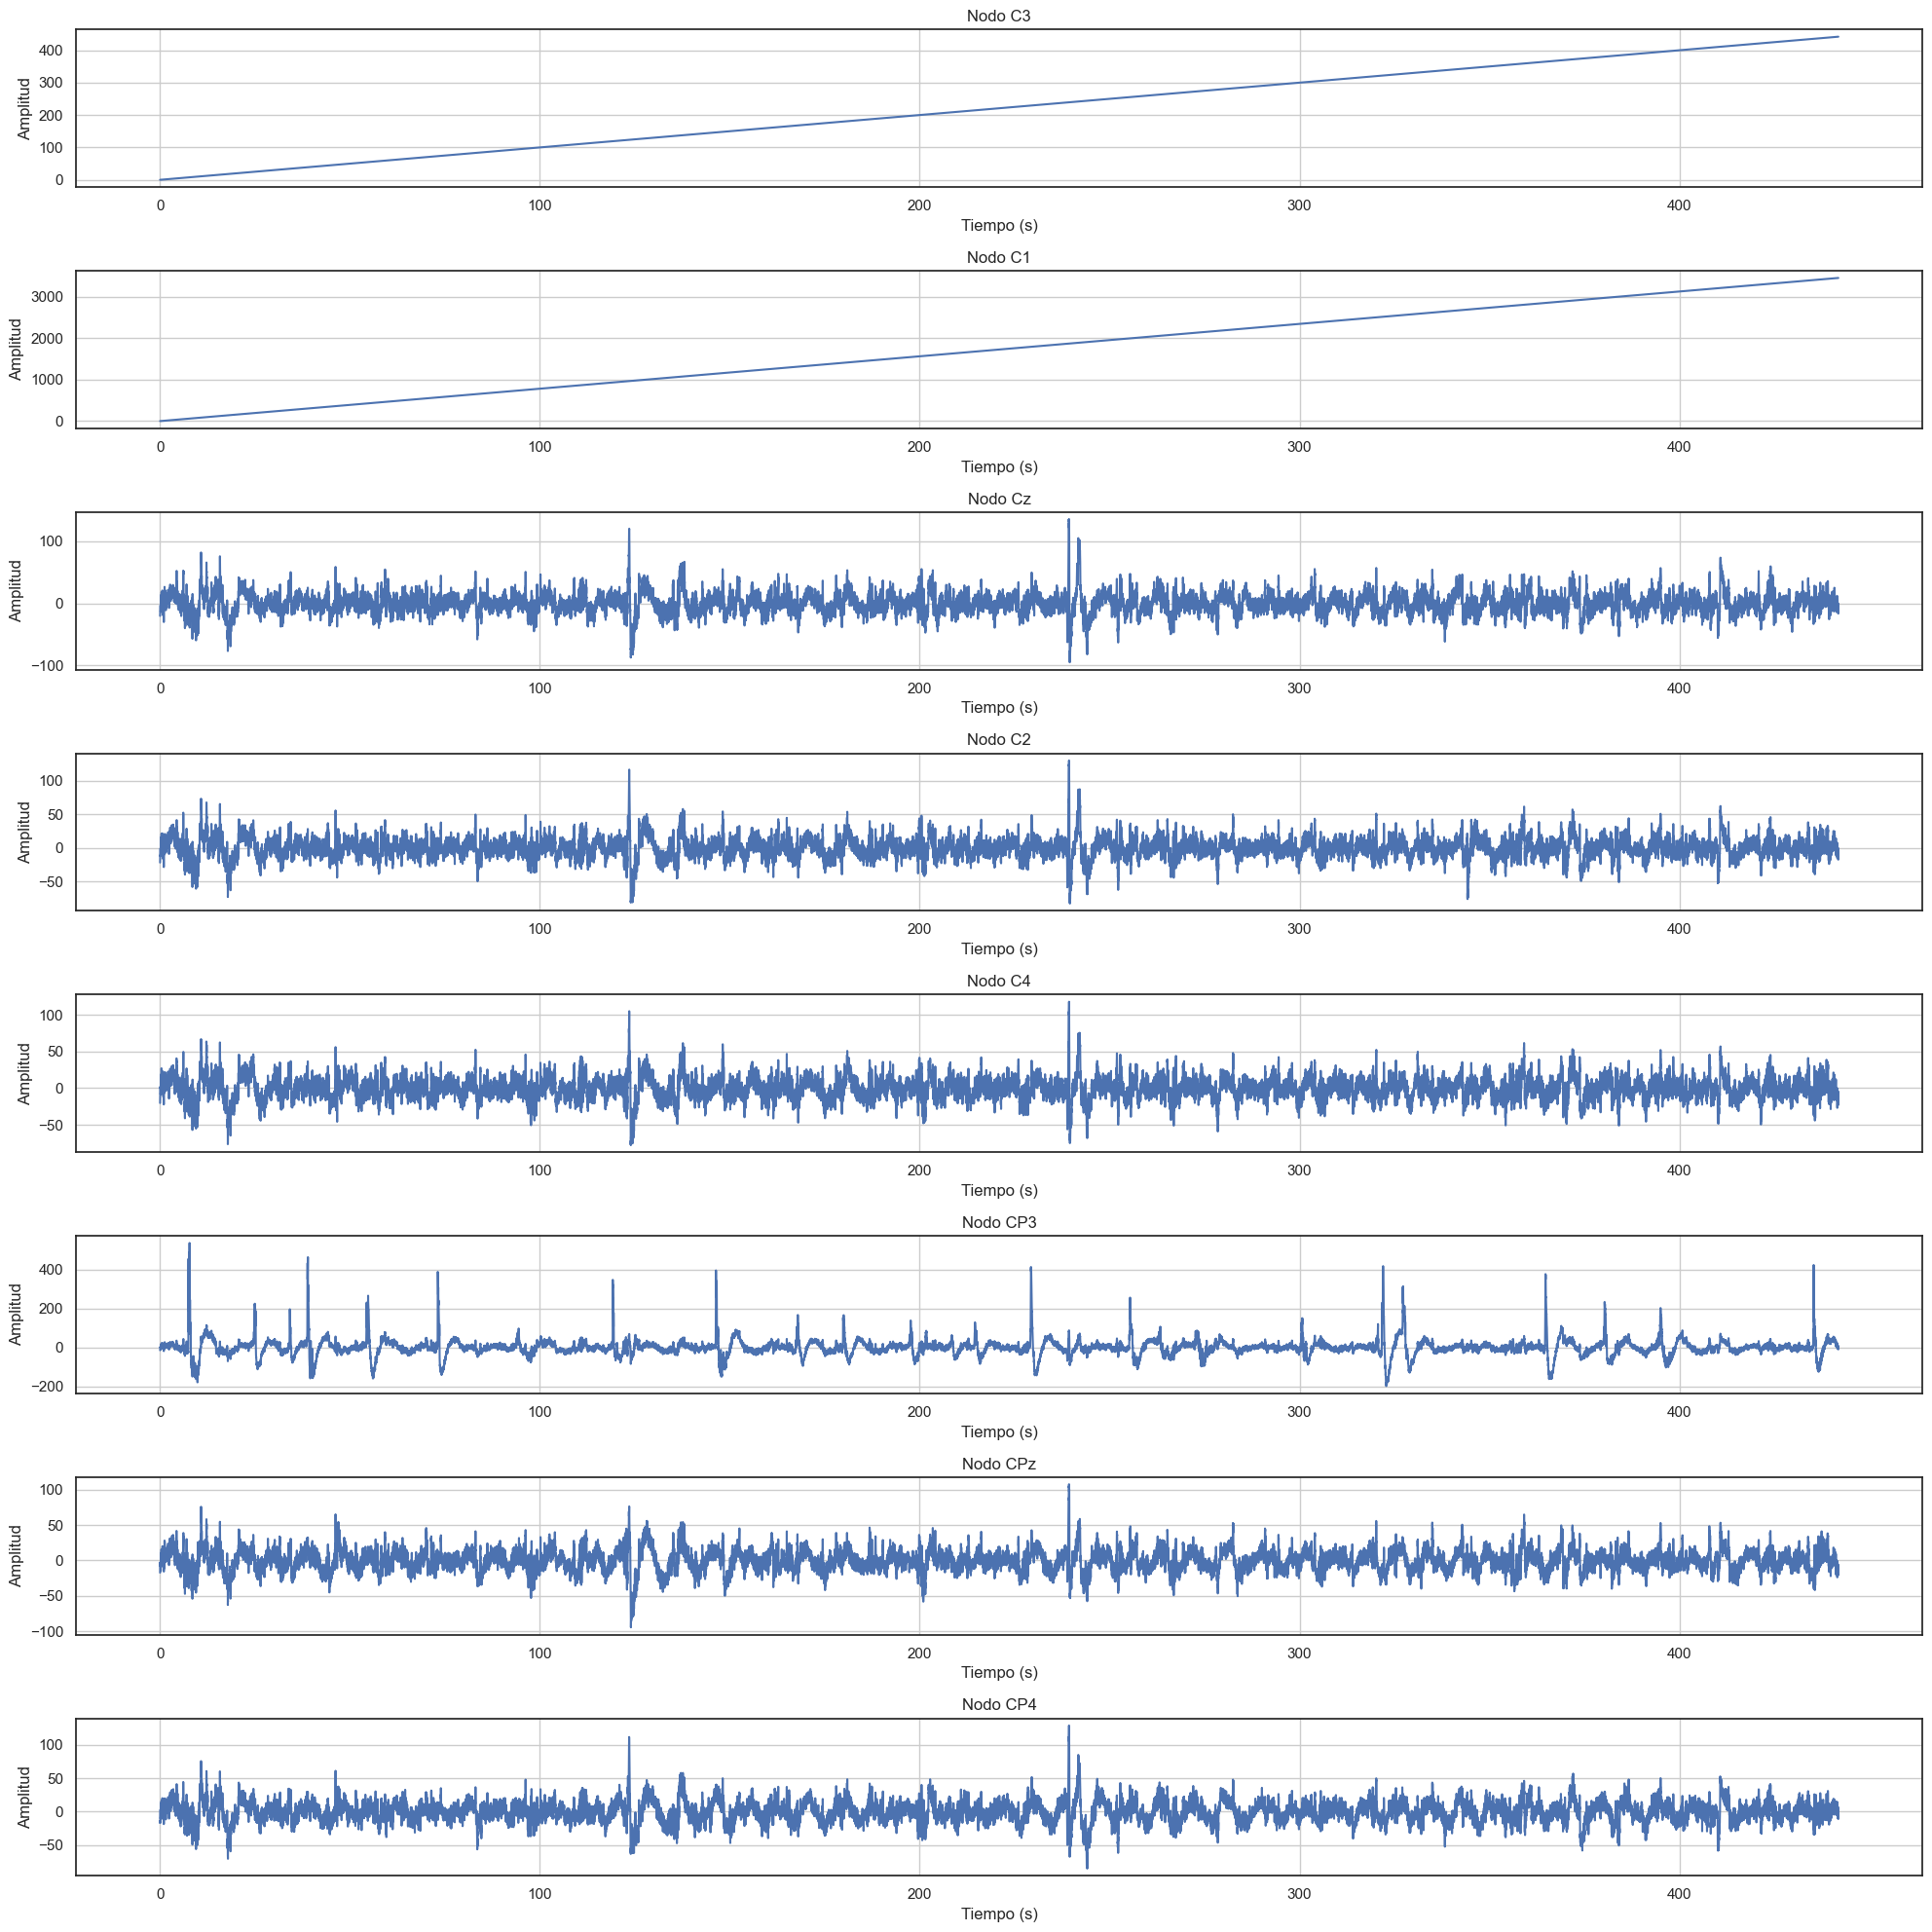

In [154]:
num_nodos = 8  # Número de nodos EEG
nombre_nodos = ['C3', 'C1', 'Cz', 'C2', 'C4', 'CP3', 'CPz', 'CP4']

plt.figure(figsize=(20, 20))

for nodo in range(num_nodos):
    plt.subplot(num_nodos, 1, nodo + 1)  # Crear un subgráfico para cada nodo
    plt.plot(df['Time:250Hz'], df.iloc[:, nodo])

    plt.title(f'Nodo {nombre_nodos[nodo]}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()

plt.show()

### Canal y Montaje del Modelo RAW EEG

In [155]:
# Arreglo de datos
df1 = df.drop(columns=['Time:250Hz', 'Epoch'])

names = df1.columns.tolist()

In [156]:
#Definir información del canal y el montaje para MNE (EEG)

sfreq = 250
ch_types = ["eeg"] * df1.shape[1]
ch_names = names

montage = mne.channels.make_standard_montage('standard_1020')
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

samples = df1.T *1e-6

loadedRaw1 = mne.io.RawArray(samples, info)
loadedRaw1.set_montage(montage = montage)

Creating RawArray with float64 data, n_channels=8, n_times=110464
    Range : 0 ... 110463 =      0.000 ...   441.852 secs
Ready.


<RawArray | 8 x 110464 (441.9 s), ~6.8 MB, data loaded>

### Histograma de datos

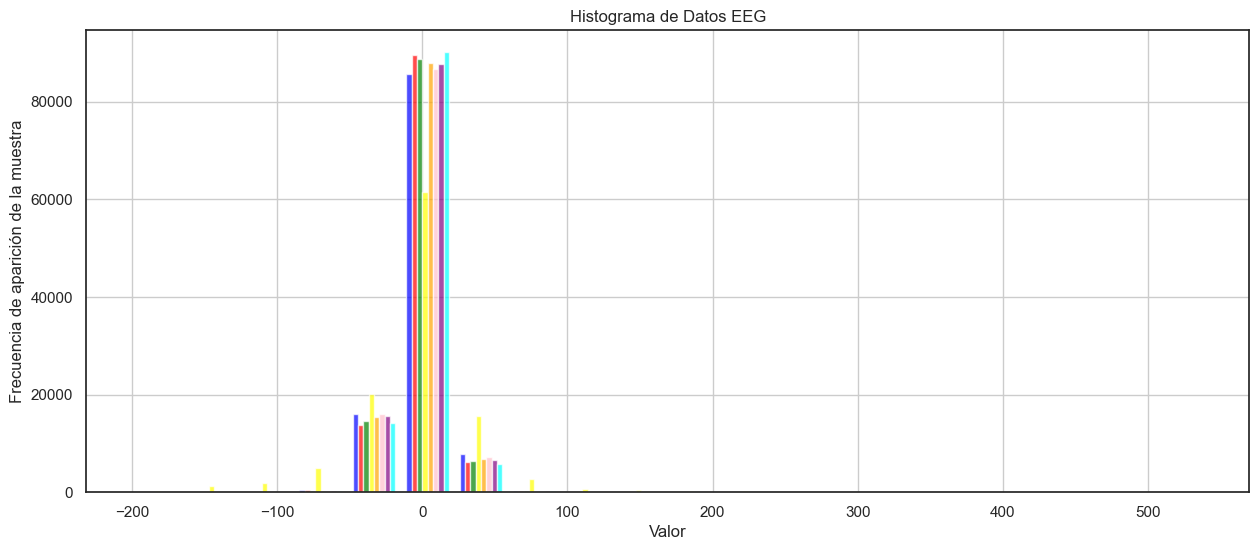

In [157]:
plt.figure(figsize=(15, 6))
plt.hist(df1, bins=20, color=['blue', 'red', 'green', 'yellow', 'orange', 'pink', 'purple', 'cyan'], alpha=0.7)
plt.title('Histograma de Datos EEG')
plt.xlabel('Valor')
plt.ylabel('Frecuencia de aparición de la muestra')
plt.grid(True)

# Muestra el histograma
plt.show()

#### Estadísticas descriptivas

In [158]:
# Calcula estadísticas descriptivas
media = np.mean(df1)
mediana = np.median(df1)
desviacion_estandar = np.std(df1)
varianza = np.var(df1)

# Muestra las estadísticas descriptivas
print(f'Media:\n{media.round(2)}')
print(f'\nMediana:\n{mediana.round(2)}')
print(f'\nDesviación Estándar:\n{desviacion_estandar.round(2)}')
print(f'\nVarianza:\n{varianza.round(2)}')

Media:
0.0

Mediana:
-0.11

Desviación Estándar:
C3     16.48
C1     15.16
Cz     14.91
C2     44.09
C4     14.99
CP3    15.54
CPz    15.10
CP4    14.20
dtype: float64

Varianza:
C3      271.65
C1      229.86
Cz      222.17
C2     1944.14
C4      224.66
CP3     241.39
CPz     228.08
CP4     201.66
dtype: float64


### Gráfico de Potencias de Banda

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


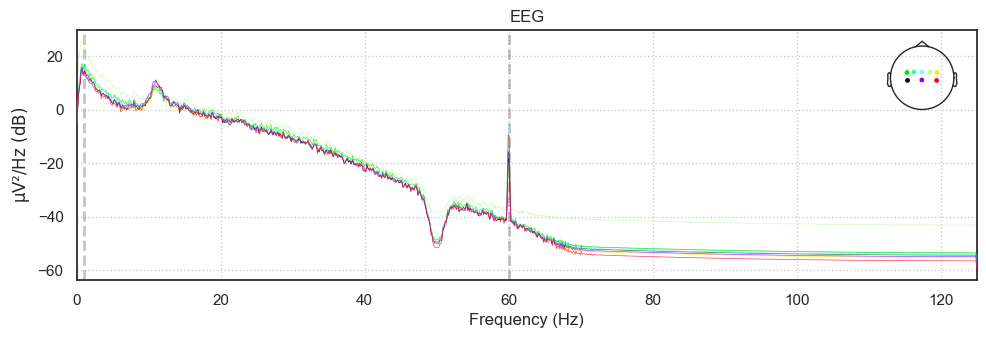

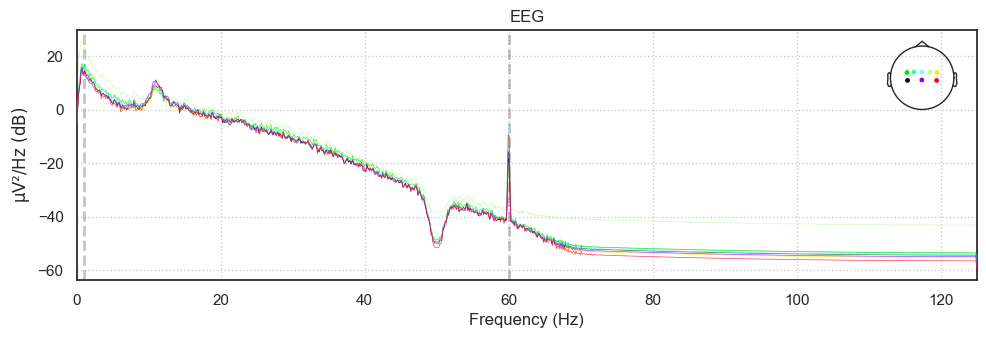

In [159]:
loadedRaw1.filter(l_freq = 1, h_freq = 60)
loadedRaw1.compute_psd().plot()

### Diagrama de Caja y Bigote

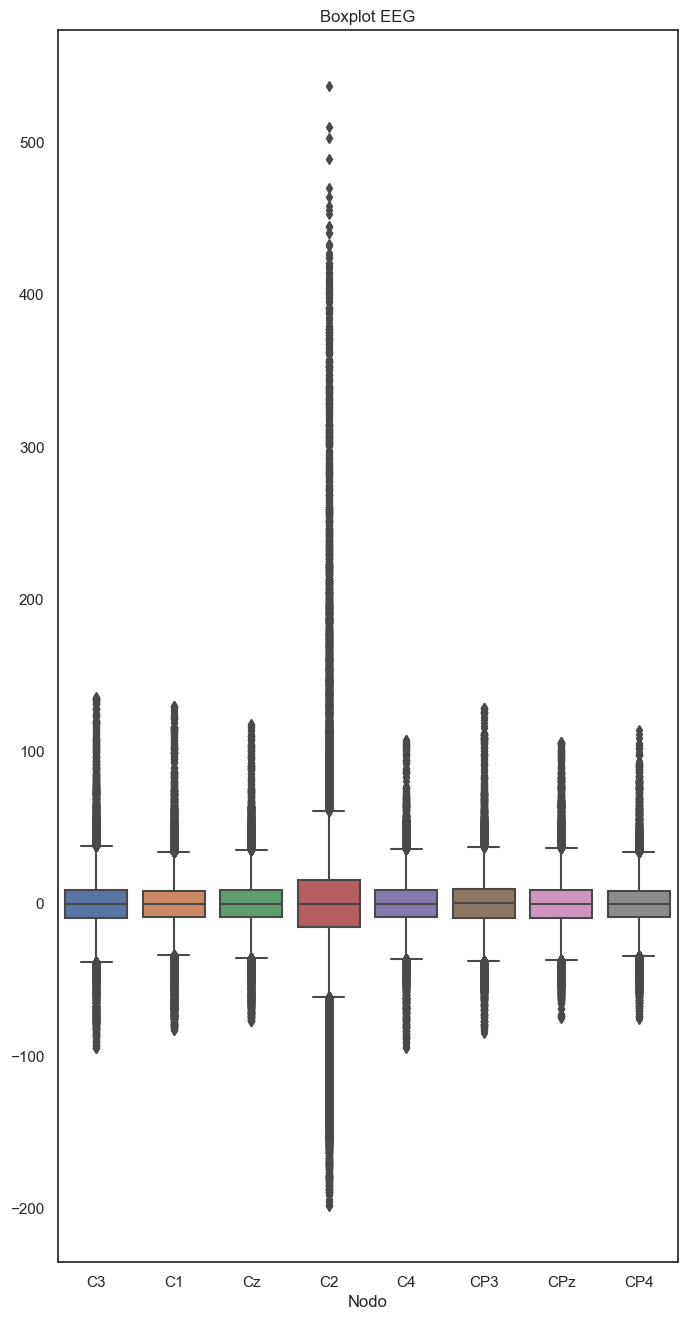

In [160]:
plt.figure(figsize=(8, 16))
sns.boxplot(data = df1)
plt.xlabel('Nodo')
plt.title('Boxplot EEG')
plt.show()

### Gráfico de Dispersión

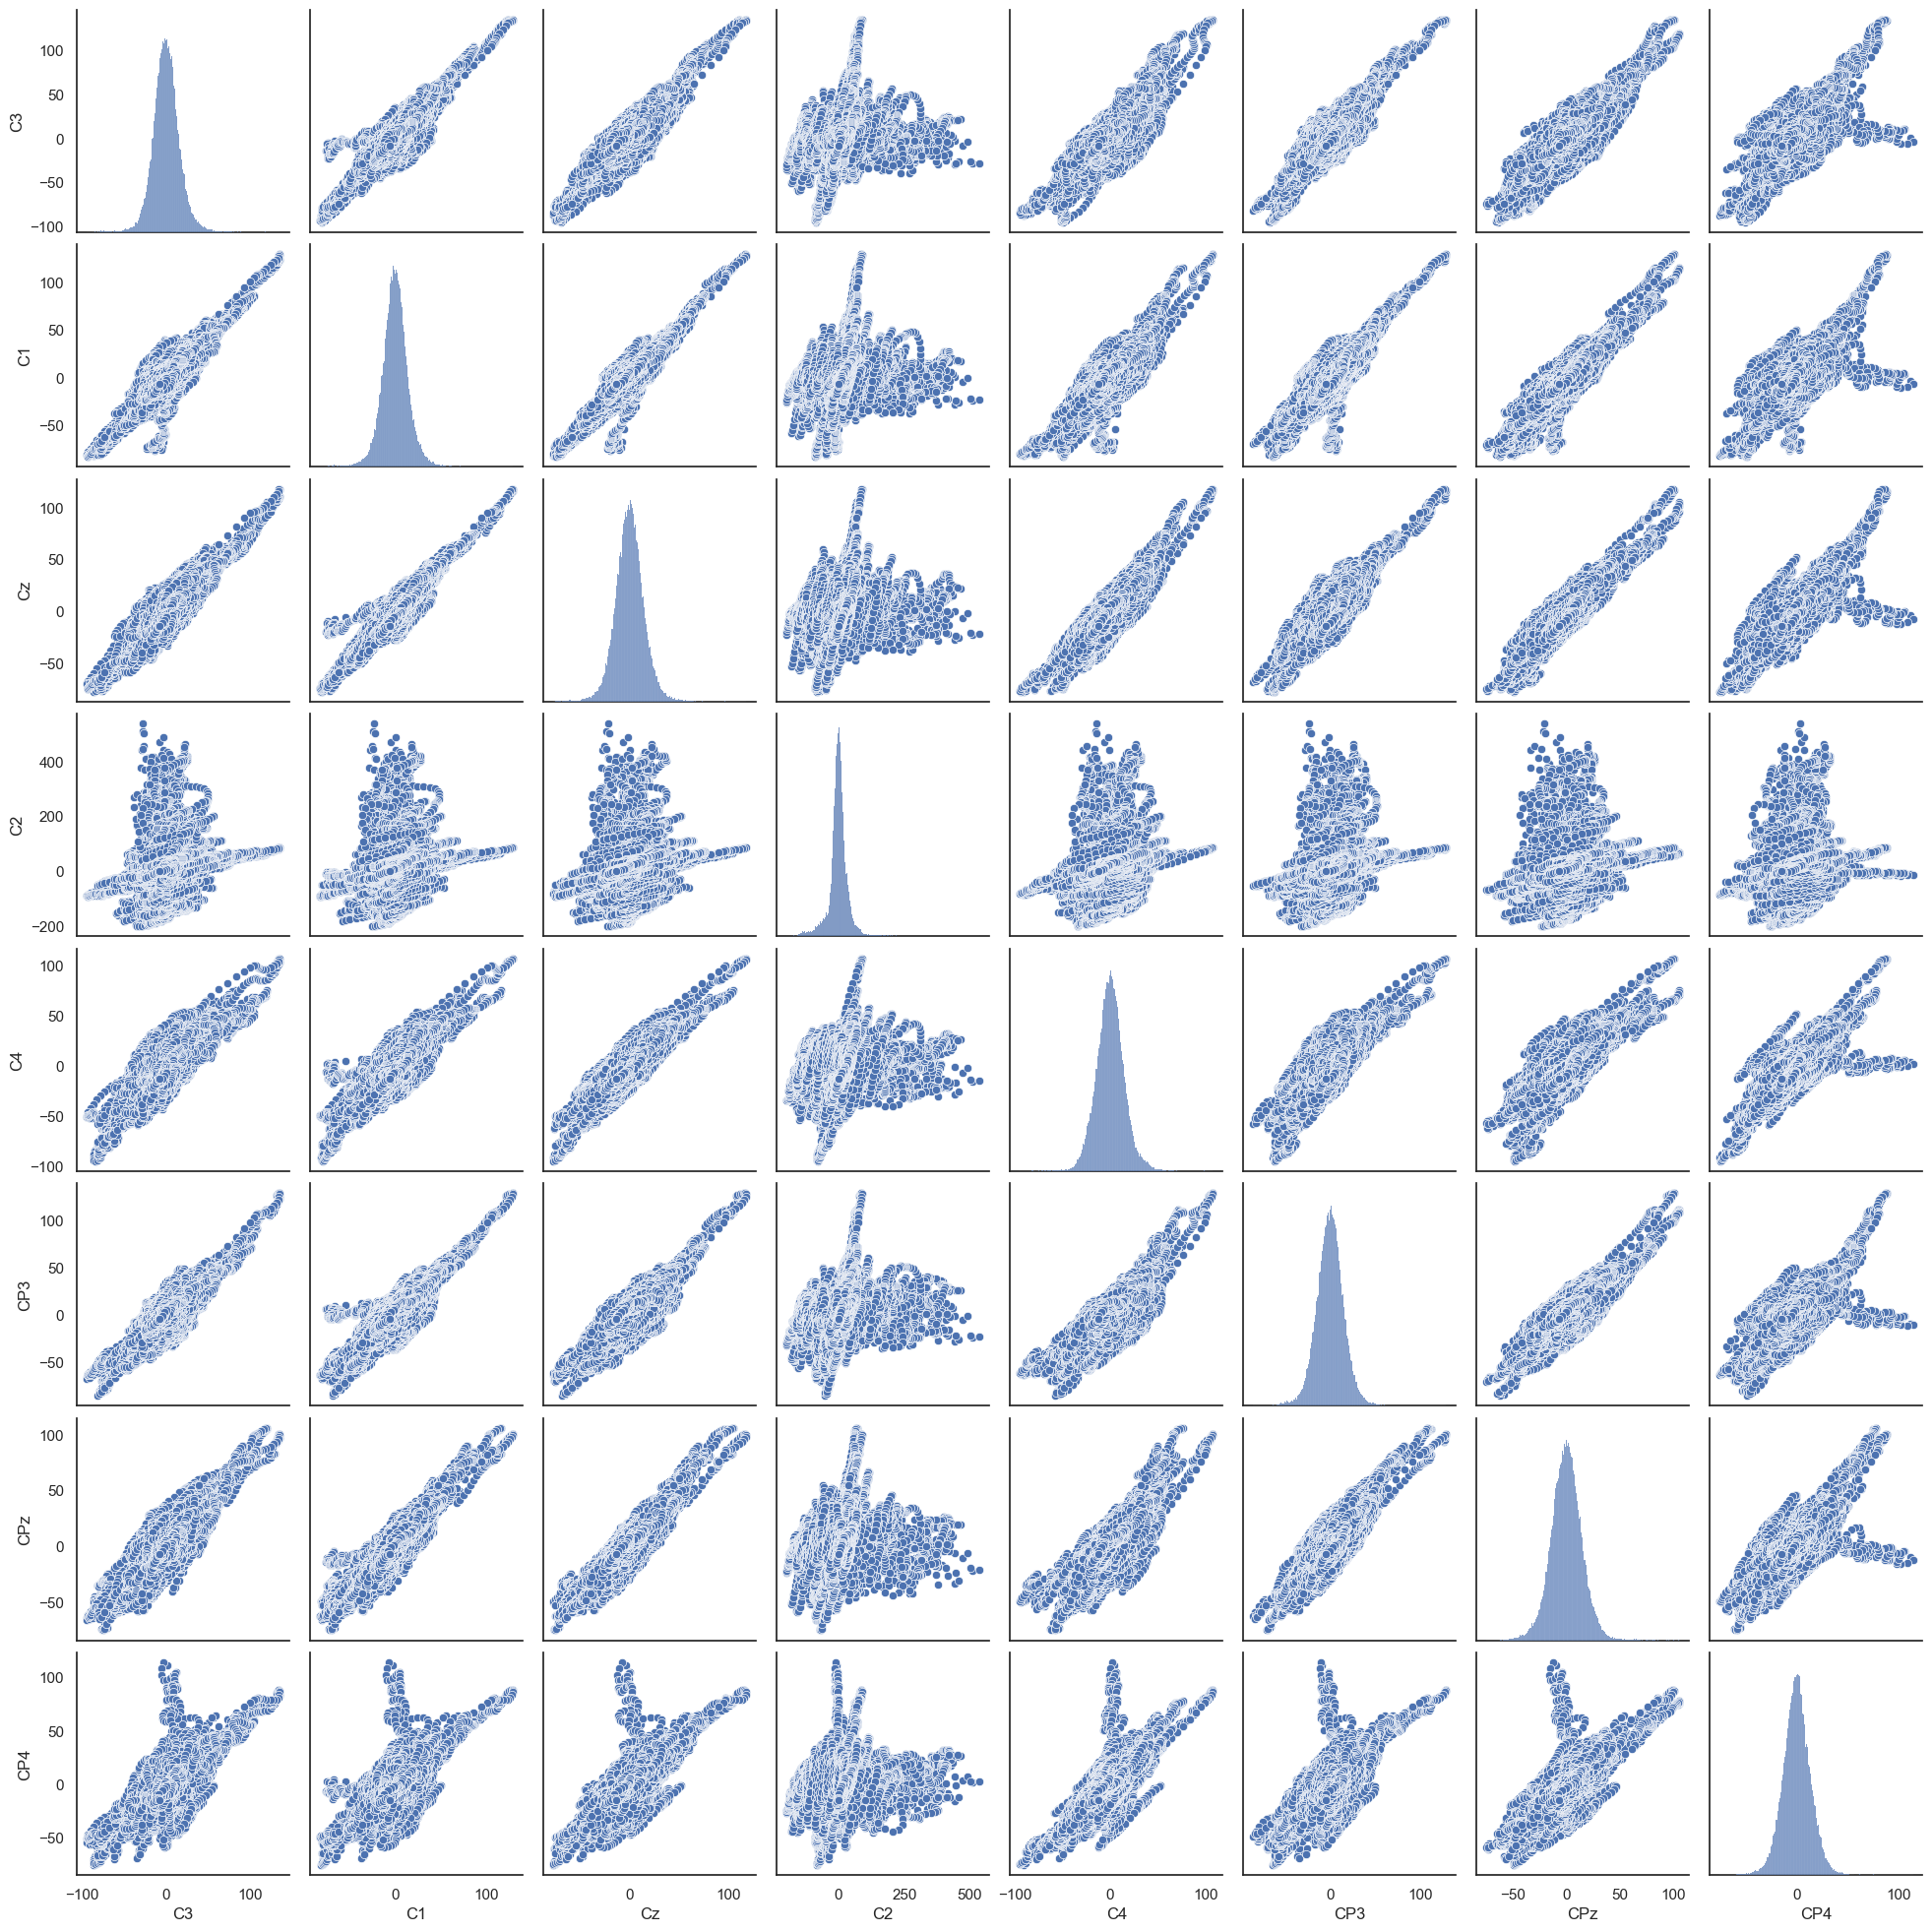

In [161]:
sns.pairplot(df1, diag_kind='hist')  # 'diag_kind' puede ser 'hist' o 'kde' para la diagonal principal

### Matriz de Correlación

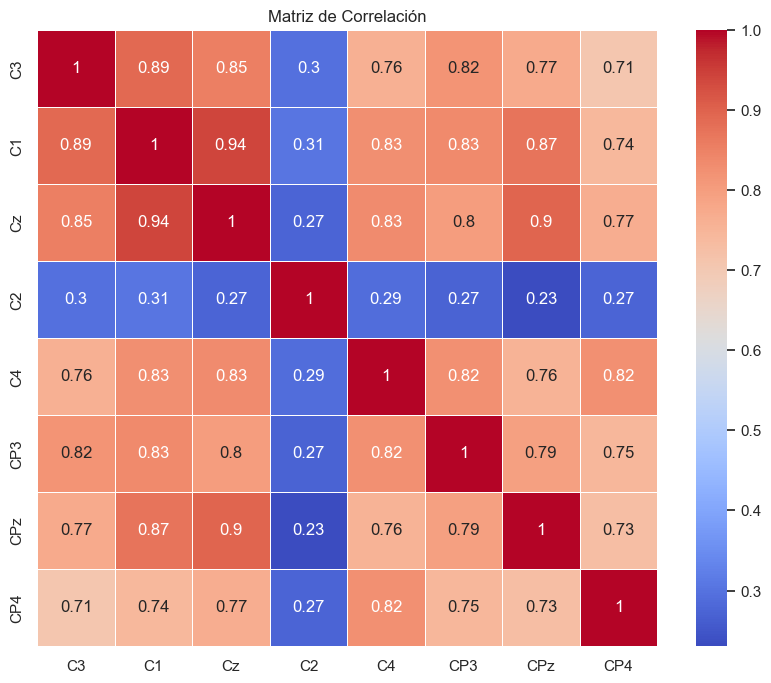

In [162]:
correlation_matrix = df1.corr()
sns.set(style='white')
plt.figure(figsize=(10, 8))

# Función heatmap de Seaborn para crear la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()